# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


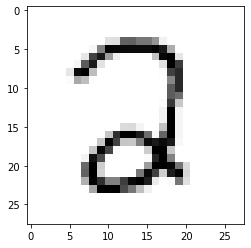

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2495
Training Accuracy: 0.5549, Testing Accuracy: 0.5418



Epoch 10, Loss 0.1013
Training Accuracy: 0.9190, Testing Accuracy: 0.9320



Epoch 20, Loss 0.0579
Training Accuracy: 0.9398, Testing Accuracy: 0.9551



Epoch 30, Loss 0.0446
Training Accuracy: 0.9519, Testing Accuracy: 0.9647



Epoch 40, Loss 0.0383
Training Accuracy: 0.9570, Testing Accuracy: 0.9657



Epoch 50, Loss 0.0347
Training Accuracy: 0.9608, Testing Accuracy: 0.9677



Epoch 60, Loss 0.0323
Training Accuracy: 0.9629, Testing Accuracy: 0.9688



Epoch 70, Loss 0.0304
Training Accuracy: 0.9649, Testing Accuracy: 0.9693



Epoch 80, Loss 0.029
Training Accuracy: 0.9663, Testing Accuracy: 0.9688



Epoch 90, Loss 0.0278
Training Accuracy: 0.9672, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0268
Training Accuracy: 0.9680, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0259
Training Accuracy: 0.9696, Testing Accuracy: 0.9688



Epoch 120, Loss 0.0251
Training Accuracy: 0.9706, Testing Accuracy: 0.9698



Epoch 130, Loss 0.0244
Training Accuracy: 0.9716, Testing Accuracy: 0.9708



Epoch 140, Loss 0.0237
Training Accuracy: 0.9726, Testing Accuracy: 0.9698



Epoch 150, Loss 0.0231
Training Accuracy: 0.9732, Testing Accuracy: 0.9718



Epoch 160, Loss 0.0226
Training Accuracy: 0.9740, Testing Accuracy: 0.9718



Epoch 170, Loss 0.0221
Training Accuracy: 0.9744, Testing Accuracy: 0.9723



Epoch 180, Loss 0.0216
Training Accuracy: 0.9750, Testing Accuracy: 0.9723



Epoch 190, Loss 0.0212
Training Accuracy: 0.9755, Testing Accuracy: 0.9723



Epoch 200, Loss 0.0207
Training Accuracy: 0.9759, Testing Accuracy: 0.9733



Epoch 210, Loss 0.0203
Training Accuracy: 0.9764, Testing Accuracy: 0.9733



Epoch 220, Loss 0.0199
Training Accuracy: 0.9772, Testing Accuracy: 0.9728



Epoch 230, Loss 0.0196
Training Accuracy: 0.9778, Testing Accuracy: 0.9733



Epoch 240, Loss 0.0192
Training Accuracy: 0.9781, Testing Accuracy: 0.9738



0.004352083127448493

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2126
Training Accuracy: 0.7754, Testing Accuracy: 0.7959



Epoch 10, Loss 0.1013
Training Accuracy: 0.9075, Testing Accuracy: 0.9214



Epoch 20, Loss 0.0791
Training Accuracy: 0.9256, Testing Accuracy: 0.9380



Epoch 30, Loss 0.0683
Training Accuracy: 0.9352, Testing Accuracy: 0.9501



Epoch 40, Loss 0.0618
Training Accuracy: 0.9402, Testing Accuracy: 0.9531



Epoch 50, Loss 0.0572
Training Accuracy: 0.9452, Testing Accuracy: 0.9541



Epoch 60, Loss 0.0539
Training Accuracy: 0.9478, Testing Accuracy: 0.9556



Epoch 70, Loss 0.0513
Training Accuracy: 0.9503, Testing Accuracy: 0.9577



Epoch 80, Loss 0.0493
Training Accuracy: 0.9519, Testing Accuracy: 0.9587



Epoch 90, Loss 0.0475
Training Accuracy: 0.9533, Testing Accuracy: 0.9607



Epoch 100, Loss 0.0461
Training Accuracy: 0.9540, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0449
Training Accuracy: 0.9552, Testing Accuracy: 0.9617



Epoch 120, Loss 0.0438
Training Accuracy: 0.9559, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0429
Training Accuracy: 0.9564, Testing Accuracy: 0.9647



Epoch 140, Loss 0.042
Training Accuracy: 0.9570, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0413
Training Accuracy: 0.9574, Testing Accuracy: 0.9647



Epoch 160, Loss 0.0406
Training Accuracy: 0.9584, Testing Accuracy: 0.9647



Epoch 170, Loss 0.04
Training Accuracy: 0.9586, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0394
Training Accuracy: 0.9591, Testing Accuracy: 0.9647



Epoch 190, Loss 0.0389
Training Accuracy: 0.9599, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0384
Training Accuracy: 0.9606, Testing Accuracy: 0.9652



Epoch 210, Loss 0.038
Training Accuracy: 0.9611, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0376
Training Accuracy: 0.9613, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0372
Training Accuracy: 0.9618, Testing Accuracy: 0.9657



Epoch 240, Loss 0.0368
Training Accuracy: 0.9623, Testing Accuracy: 0.9657



0.015606605372584202

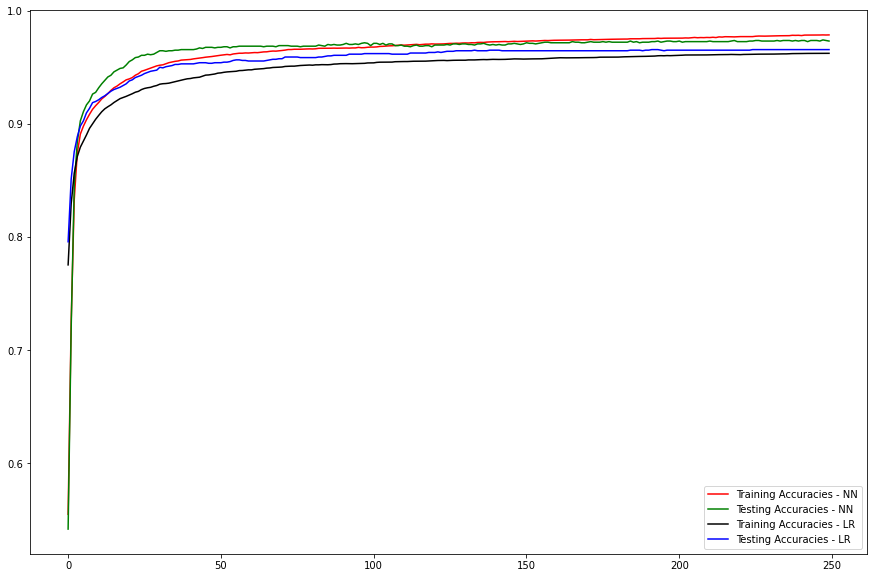

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

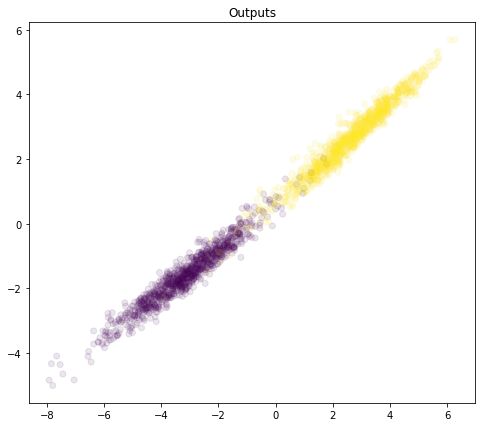

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

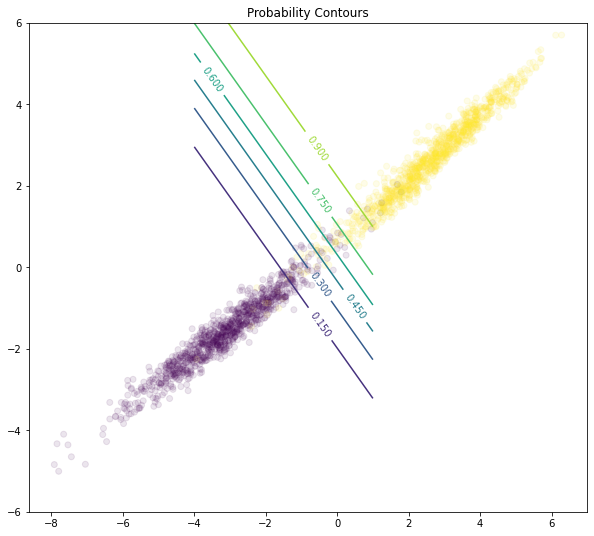

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );